In [ ]:
# @title Imports:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn import datasets, metrics, model_selection, svm
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import PrecisionRecallDisplay
from imblearn.metrics import geometric_mean_score
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
# @title Mounting Drive:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# @title Reading Diabetes Dataset:
dataset = pd.read_csv('/content/drive/MyDrive/diabetes.csv')

In [ ]:
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
# @title Data Exploration:
dataset.columns


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
dataset.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [ ]:
dataset.Outcome

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [ ]:
# @title Splitting the Train & Test Dataset:
train, test = train_test_split(dataset,test_size=0.3,random_state= 150)

In [ ]:
train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
259,11,155,76,28,150,33.3,1.353,51,1
106,1,96,122,0,0,22.4,0.207,27,0
680,2,56,56,28,45,24.2,0.332,22,0
74,1,79,75,30,0,32.0,0.396,22,0
90,1,80,55,0,0,19.1,0.258,21,0
...,...,...,...,...,...,...,...,...,...
496,5,110,68,0,0,26.0,0.292,30,0
25,10,125,70,26,115,31.1,0.205,41,1
507,1,130,60,23,170,28.6,0.692,21,0
442,4,117,64,27,120,33.2,0.230,24,0


In [ ]:
test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
261,3,141,0,0,0,30.0,0.761,27,1
255,1,113,64,35,0,33.6,0.543,21,1
285,7,136,74,26,135,26.0,0.647,51,0
312,2,155,74,17,96,26.6,0.433,27,1
62,5,44,62,0,0,25.0,0.587,36,0
...,...,...,...,...,...,...,...,...,...
405,2,123,48,32,165,42.1,0.520,26,0
138,0,129,80,0,0,31.2,0.703,29,0
685,2,129,74,26,205,33.2,0.591,25,0
346,1,139,46,19,83,28.7,0.654,22,0


<Axes: title={'center': 'Positive(1) vs Negative(0)'}, xlabel='Output class', ylabel='Count'>

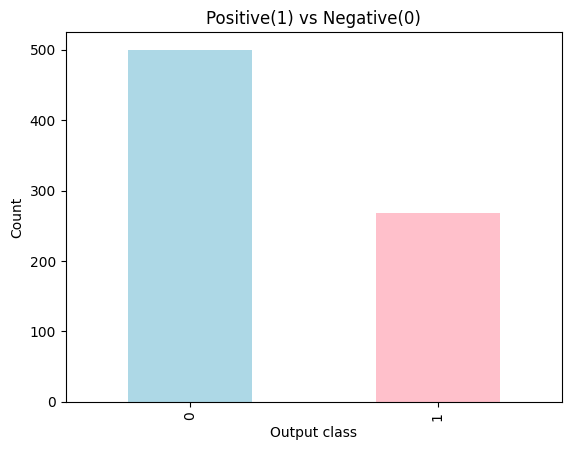

In [ ]:
# @title Dataset Visualization:
dataset.Outcome.value_counts().plot.bar(color=['lightblue', 'pink'],title="Positive(1) vs Negative(0)", xlabel="Output class", ylabel = "Count")

<Axes: title={'center': 'Positive(1) vs Negative(0)'}, xlabel='Output class', ylabel='Count'>

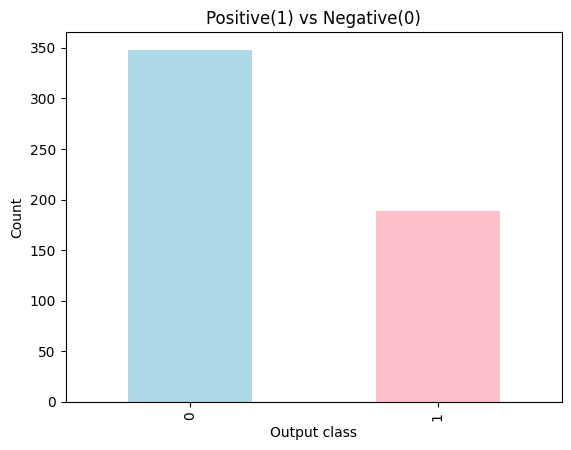

In [ ]:
# @title Train Dataset Visualization:
train.Outcome.value_counts().plot.bar(color=['lightblue', 'pink'],title="Positive(1) vs Negative(0)", xlabel="Output class", ylabel = "Count")

<Axes: title={'center': 'Positive(1) vs Negative(0)'}, xlabel='Output class', ylabel='Count'>

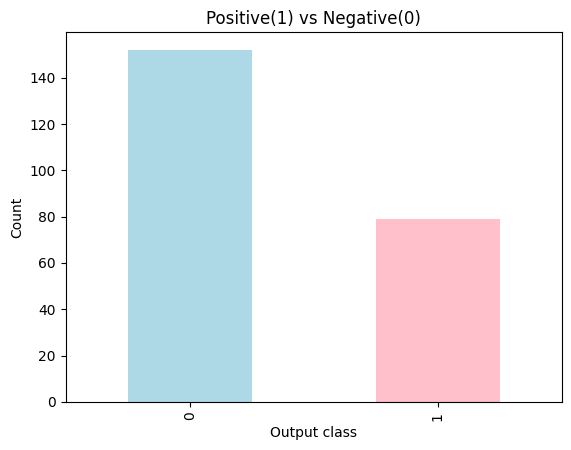

In [ ]:
# @title Test Dataset Visualization:
test.Outcome.value_counts().plot.bar(color=['lightblue', 'pink'],title="Positive(1) vs Negative(0)", xlabel="Output class", ylabel = "Count")

In [ ]:
X_train = train.iloc[:, :8].values
y_train = train.iloc[:, 8].values

X_test = test.iloc[:, :8].values
y_test = test.iloc[:, 8].values

In [ ]:
X_test

array([[  3.   , 141.   ,   0.   , ...,  30.   ,   0.761,  27.   ],
       [  1.   , 113.   ,  64.   , ...,  33.6  ,   0.543,  21.   ],
       [  7.   , 136.   ,  74.   , ...,  26.   ,   0.647,  51.   ],
       ...,
       [  2.   , 129.   ,  74.   , ...,  33.2  ,   0.591,  25.   ],
       [  1.   , 139.   ,  46.   , ...,  28.7  ,   0.654,  22.   ],
       [  5.   , 126.   ,  78.   , ...,  29.6  ,   0.439,  40.   ]])

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(537, 8)
(537,)
(231, 8)
(231,)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy score:  76.19047619047619
F1 score:  62.06896551724138
Precision score:  68.18181818181817
Recall score:  56.9620253164557


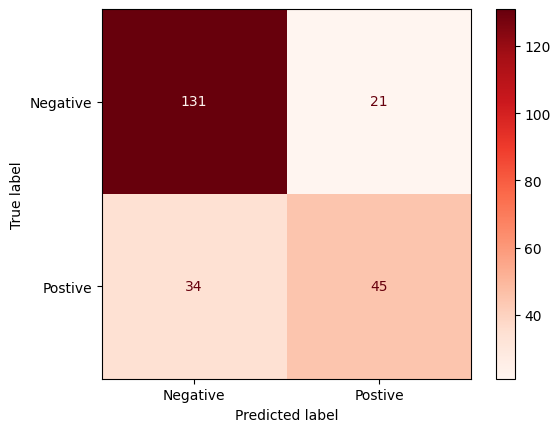

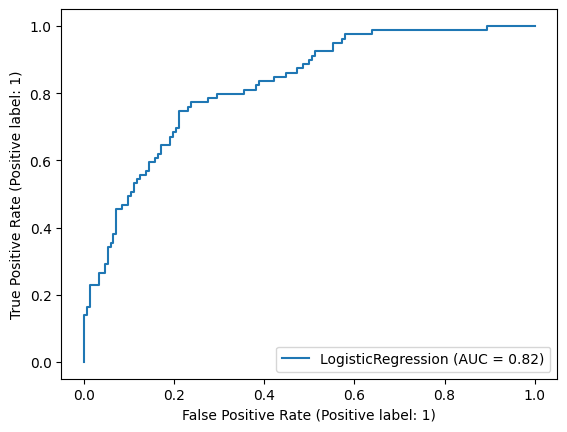

In [ ]:
# @title Logistic Regression:

clf = LogisticRegression(random_state=1).fit(X_train, y_train)
Y_pred = clf.predict(X_test)
clf.predict_proba(X_test)

cm = confusion_matrix(y_test, Y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Negative','Postive'])
cmd.plot(cmap=plt.cm.Reds)

print('Accuracy score: ', accuracy_score(y_test, Y_pred)*100)
print('F1 score: ', f1_score(y_test, Y_pred)*100)
print('Precision score: ', precision_score(y_test, Y_pred)*100)
print('Recall score: ', recall_score(y_test, Y_pred)*100)

from sklearn.metrics import RocCurveDisplay
rfc_disp = RocCurveDisplay.from_estimator(clf, X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy score:  76.19047619047619
F1 score:  62.585034013605444
Precision score:  67.64705882352942
Recall score:  58.22784810126582


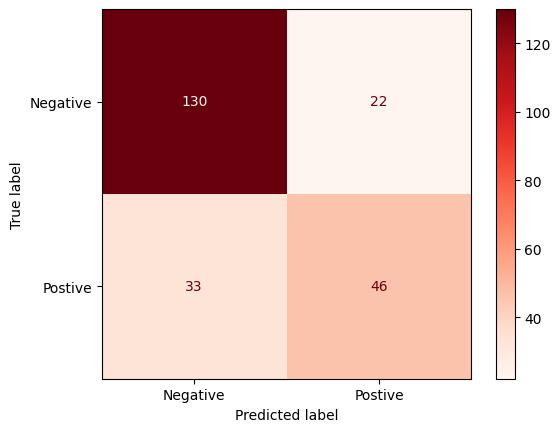

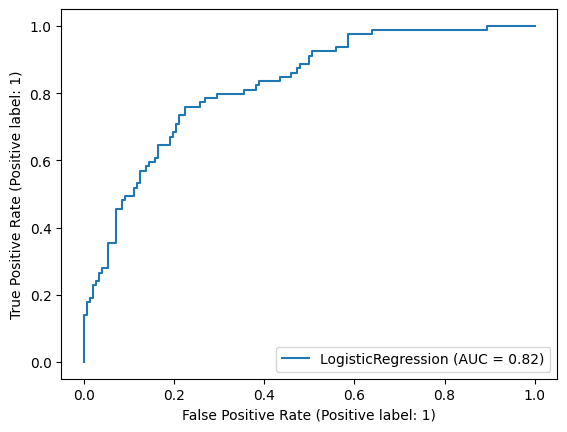

In [ ]:
clf = LogisticRegression(penalty=None).fit(X_train, y_train)
Y_pred = clf.predict(X_test)
clf.predict_proba(X_test)

cm = confusion_matrix(y_test, Y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Negative','Postive'])
cmd.plot(cmap=plt.cm.Reds)

print('Accuracy score: ', accuracy_score(y_test, Y_pred)*100)
print('F1 score: ', f1_score(y_test, Y_pred)*100)
print('Precision score: ', precision_score(y_test, Y_pred)*100)
print('Recall score: ', recall_score(y_test, Y_pred)*100)

from sklearn.metrics import RocCurveDisplay
rfc_disp = RocCurveDisplay.from_estimator(clf, X_test, y_test)

Accuracy score:  76.19047619047619
F1 score:  63.576158940397356
Precision score:  66.66666666666666
Recall score:  60.75949367088608


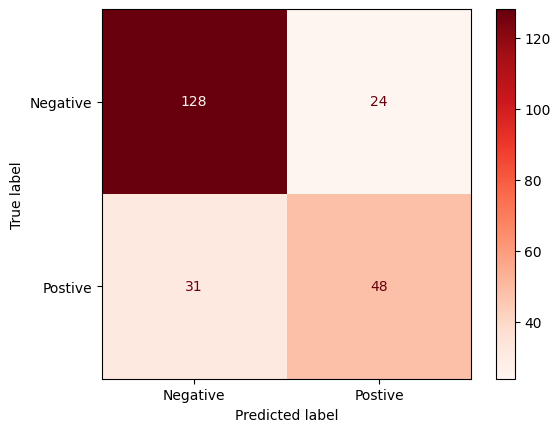

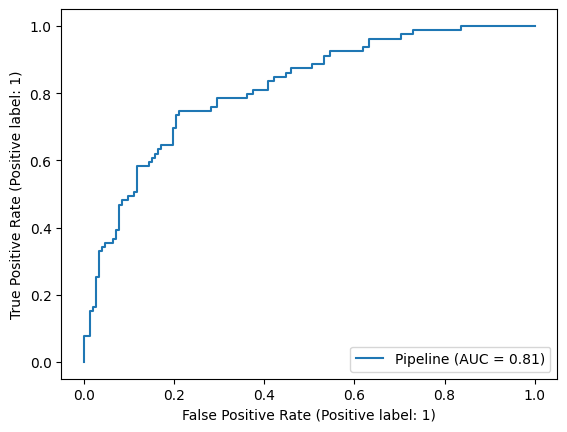

In [ ]:
# @title SVM Confusion Matrix:

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train, y_train)
Y_pred= clf.predict(X_test)

cm = confusion_matrix(y_test, Y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Negative','Postive'])
cmd.plot(cmap=plt.cm.Reds)

print('Accuracy score: ', accuracy_score(y_test, Y_pred)*100)
print('F1 score: ', f1_score(y_test, Y_pred)*100)
print('Precision score: ', precision_score(y_test, Y_pred)*100)
print('Recall score: ', recall_score(y_test, Y_pred)*100)

from sklearn.metrics import RocCurveDisplay
rfc_disp = RocCurveDisplay.from_estimator(clf, X_test, y_test)

Accuracy score:  74.45887445887446
F1 score:  50.42016806722689
Precision score:  75.0
Recall score:  37.9746835443038


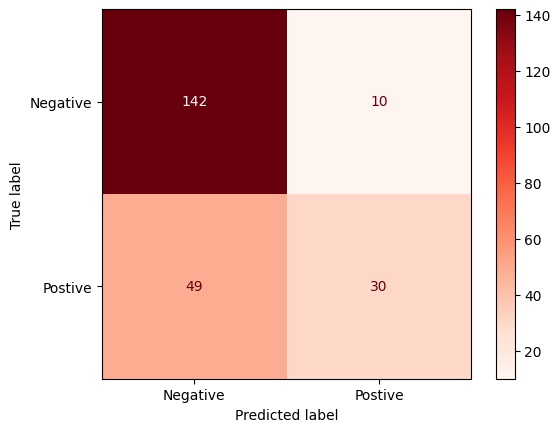

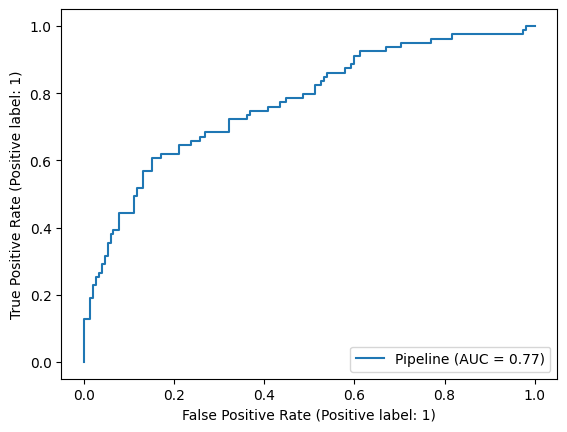

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

clf = make_pipeline(StandardScaler(), SVC(kernel='poly'))
clf.fit(X_train, y_train)
Y_pred= clf.predict(X_test)

cm = confusion_matrix(y_test, Y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Negative','Postive'])
cmd.plot(cmap=plt.cm.Reds)

print('Accuracy score: ', accuracy_score(y_test, Y_pred)*100)
print('F1 score: ', f1_score(y_test, Y_pred)*100)
print('Precision score: ', precision_score(y_test, Y_pred)*100)
print('Recall score: ', recall_score(y_test, Y_pred)*100)

from sklearn.metrics import RocCurveDisplay
rfc_disp = RocCurveDisplay.from_estimator(clf, X_test, y_test)

Accuracy score:  72.72727272727273
F1 score:  58.82352941176471
Precision score:  60.810810810810814
Recall score:  56.9620253164557


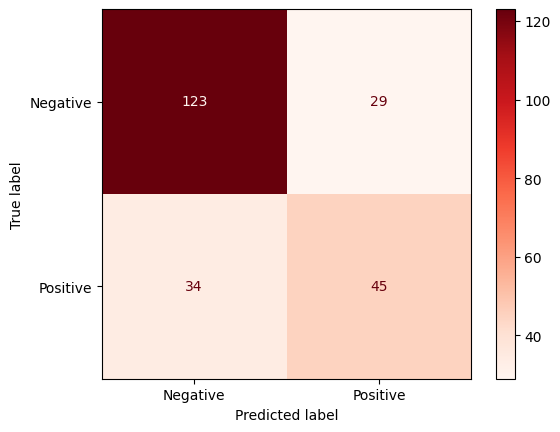

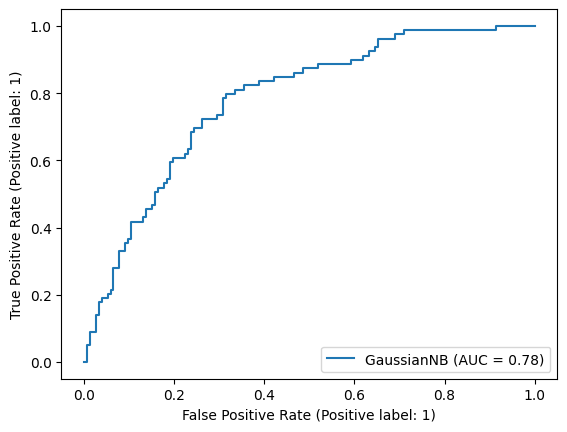

In [ ]:
# @title Gaussian Naive Bayes:

gnb = GaussianNB()
gnb.fit(X_train, y_train)
Y_pred = gnb.predict(X_test)

cm = confusion_matrix(y_test, Y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Negative','Positive'])
cmd.plot(cmap=plt.cm.Reds)

print('Accuracy score: ', accuracy_score(y_test, Y_pred)*100)
print('F1 score: ', f1_score(y_test, Y_pred)*100)
print('Precision score: ', precision_score(y_test, Y_pred)*100)
print('Recall score: ', recall_score(y_test, Y_pred)*100)

from sklearn.metrics import RocCurveDisplay
rfc_disp = RocCurveDisplay.from_estimator(gnb, X_test, y_test)

Accuracy score:  65.36796536796537
F1 score:  4.761904761904762
Precision score:  40.0
Recall score:  2.5316455696202533


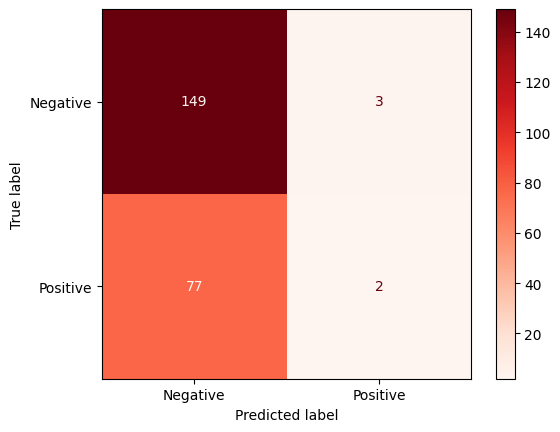

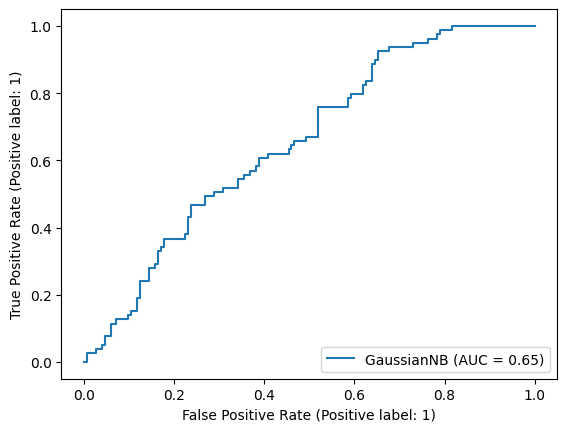

In [ ]:
gnb = GaussianNB(var_smoothing=2.1)
gnb.fit(X_train, y_train)
Y_pred = gnb.predict(X_test)

cm = confusion_matrix(y_test, Y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Negative','Positive'])
cmd.plot(cmap=plt.cm.Reds)

print('Accuracy score: ', accuracy_score(y_test, Y_pred)*100)
print('F1 score: ', f1_score(y_test, Y_pred)*100)
print('Precision score: ', precision_score(y_test, Y_pred)*100)
print('Recall score: ', recall_score(y_test, Y_pred)*100)

from sklearn.metrics import RocCurveDisplay
rfc_disp = RocCurveDisplay.from_estimator(gnb, X_test, y_test)

Accuracy score:  74.89177489177489
F1 score:  57.35294117647059
Precision score:  68.42105263157895
Recall score:  49.36708860759494


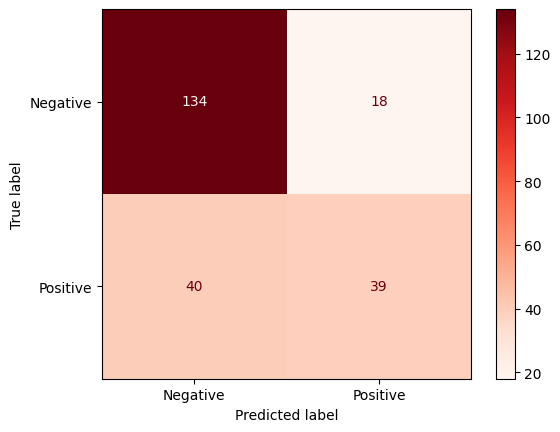

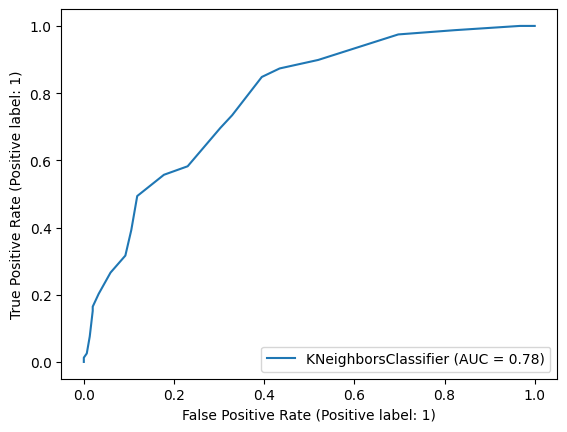

In [ ]:
# @title K Nearest Neighbour:

neigh = KNeighborsClassifier(n_neighbors=23) # n_neighbors = root of 537 (number of rows in training dataset)
neigh.fit(X_train, y_train)
Y_pred = neigh.predict(X_test)

cm = confusion_matrix(y_test, Y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Negative','Positive'])
cmd.plot(cmap=plt.cm.Reds)

print('Accuracy score: ', accuracy_score(y_test, Y_pred)*100)
print('F1 score: ', f1_score(y_test, Y_pred)*100)
print('Precision score: ', precision_score(y_test, Y_pred)*100)
print('Recall score: ', recall_score(y_test, Y_pred)*100)

from sklearn.metrics import RocCurveDisplay
rfc_disp = RocCurveDisplay.from_estimator(neigh, X_test, y_test)

Accuracy score:  68.83116883116884
F1 score:  51.35135135135135
Precision score:  55.072463768115945
Recall score:  48.10126582278481


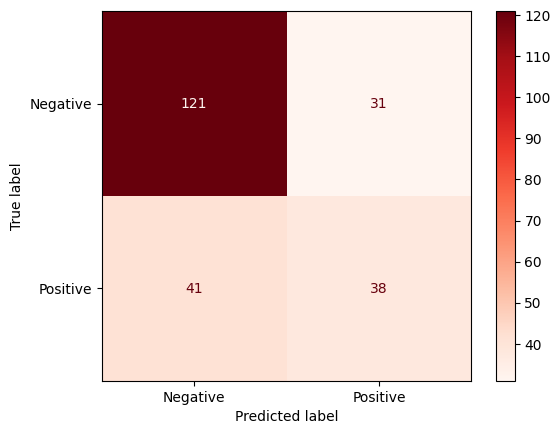

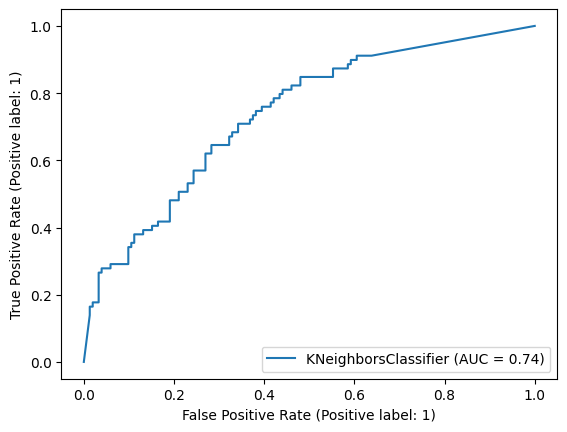

In [ ]:
neigh = KNeighborsClassifier(weights='distance')
neigh.fit(X_train, y_train)
Y_pred = neigh.predict(X_test)

cm = confusion_matrix(y_test, Y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Negative','Positive'])
cmd.plot(cmap=plt.cm.Reds)

print('Accuracy score: ', accuracy_score(y_test, Y_pred)*100)
print('F1 score: ', f1_score(y_test, Y_pred)*100)
print('Precision score: ', precision_score(y_test, Y_pred)*100)
print('Recall score: ', recall_score(y_test, Y_pred)*100)

from sklearn.metrics import RocCurveDisplay
rfc_disp = RocCurveDisplay.from_estimator(neigh, X_test, y_test)

Accuracy score:  75.75757575757575
F1 score:  61.11111111111111
Precision score:  67.6923076923077
Recall score:  55.69620253164557


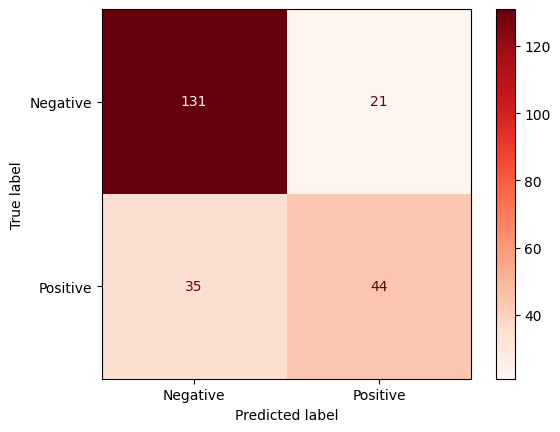

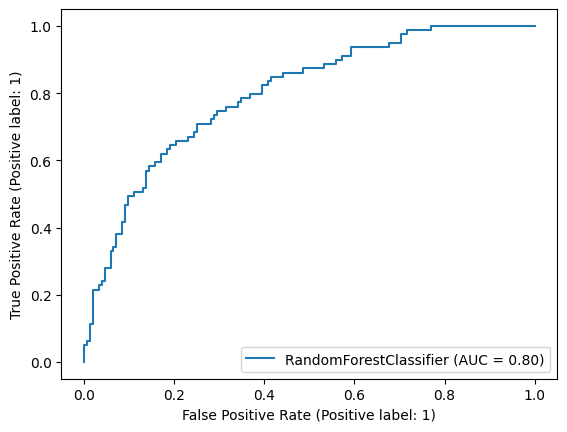

In [ ]:
# @title Random Forest Classifier:

rf = RandomForestClassifier(max_depth=7, random_state=0)
rf.fit(X_train, y_train)
Y_pred = rf.predict(X_test)

cm = confusion_matrix(y_test, Y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Negative','Positive'])
cmd.plot(cmap=plt.cm.Reds)

print('Accuracy score: ', accuracy_score(y_test, Y_pred)*100)
print('F1 score: ', f1_score(y_test, Y_pred)*100)
print('Precision score: ', precision_score(y_test, Y_pred)*100)
print('Recall score: ', recall_score(y_test, Y_pred)*100)

from sklearn.metrics import RocCurveDisplay
rfc_disp = RocCurveDisplay.from_estimator(rf, X_test, y_test)

Accuracy score:  74.45887445887446
F1 score:  60.9271523178808
Precision score:  63.888888888888886
Recall score:  58.22784810126582


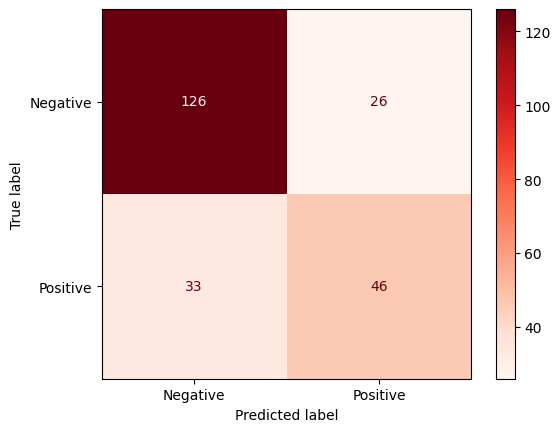

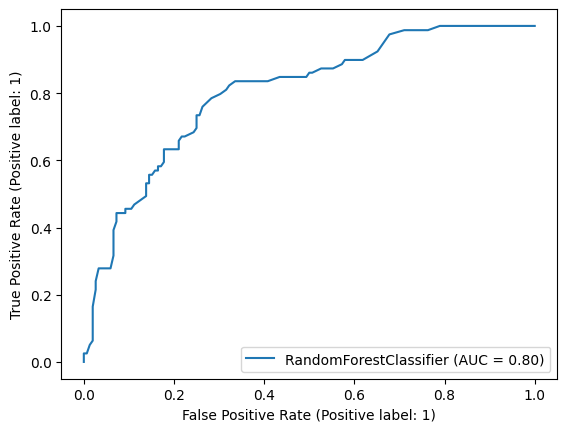

In [ ]:
rf = RandomForestClassifier(n_estimators=101)
rf.fit(X_train, y_train)
Y_pred = rf.predict(X_test)

cm = confusion_matrix(y_test, Y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Negative','Positive'])
cmd.plot(cmap=plt.cm.Reds)

print('Accuracy score: ', accuracy_score(y_test, Y_pred)*100)
print('F1 score: ', f1_score(y_test, Y_pred)*100)
print('Precision score: ', precision_score(y_test, Y_pred)*100)
print('Recall score: ', recall_score(y_test, Y_pred)*100)

from sklearn.metrics import RocCurveDisplay
rfc_disp = RocCurveDisplay.from_estimator(rf, X_test, y_test)

Accuracy score:  70.995670995671
F1 score:  58.38509316770186
Precision score:  57.3170731707317
Recall score:  59.49367088607595


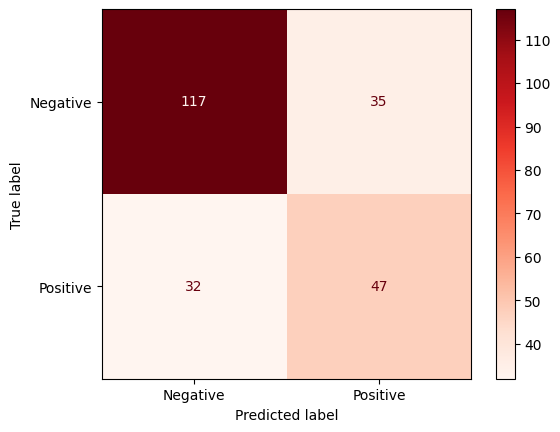

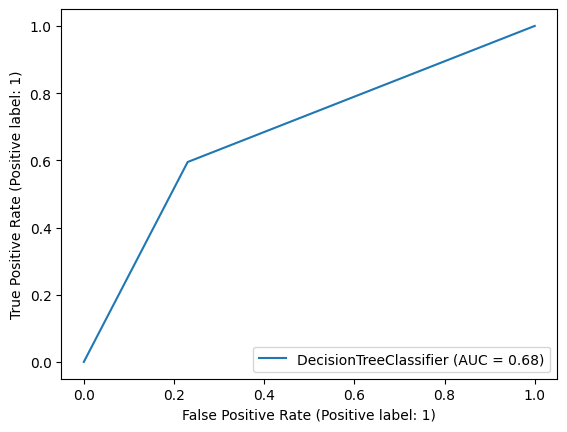

In [ ]:
# @title Decision Tree Classifier:

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
Y_pred = dt.predict(X_test)

cm = confusion_matrix(y_test, Y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Negative','Positive'])
cmd.plot(cmap=plt.cm.Reds)

print('Accuracy score: ', accuracy_score(y_test, Y_pred)*100)
print('F1 score: ', f1_score(y_test, Y_pred)*100)
print('Precision score: ', precision_score(y_test, Y_pred)*100)
print('Recall score: ', recall_score(y_test, Y_pred)*100)

from sklearn.metrics import RocCurveDisplay
rfc_disp = RocCurveDisplay.from_estimator(dt, X_test, y_test)

Accuracy score:  67.09956709956711
F1 score:  52.5
Precision score:  51.85185185185185
Recall score:  53.16455696202531


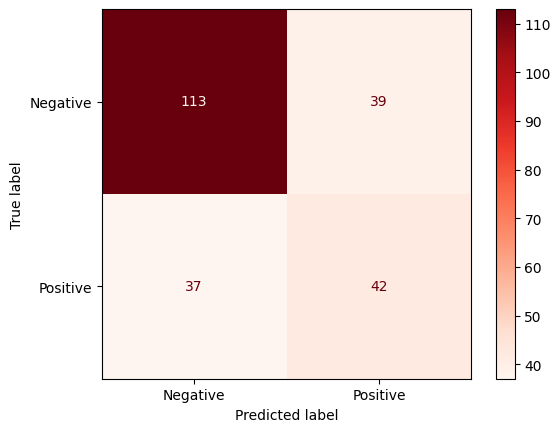

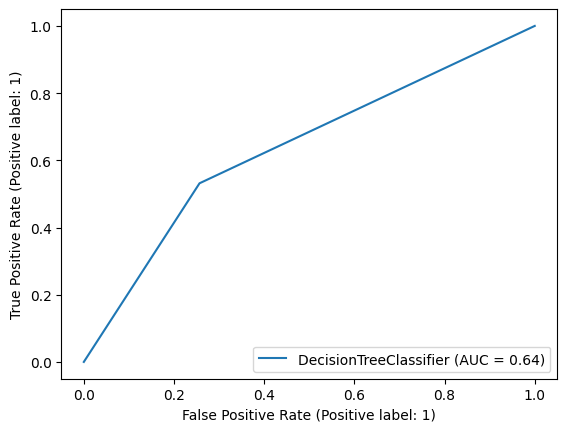

In [ ]:
dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(X_train, y_train)
Y_pred = dt.predict(X_test)

cm = confusion_matrix(y_test, Y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Negative','Positive'])
cmd.plot(cmap=plt.cm.Reds)

print('Accuracy score: ', accuracy_score(y_test, Y_pred)*100)
print('F1 score: ', f1_score(y_test, Y_pred)*100)
print('Precision score: ', precision_score(y_test, Y_pred)*100)
print('Recall score: ', recall_score(y_test, Y_pred)*100)

from sklearn.metrics import RocCurveDisplay
rfc_disp = RocCurveDisplay.from_estimator(dt, X_test, y_test)